In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_absolute_error

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(int(mean_absolute_error(true_values_train, pred_values_train))) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' + str(int(mean_absolute_error(true_values_test, pred_values_test)))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train, y=true_values_train)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

In [3]:
train = pd.read_csv('data_housing_model/train_housing_prepared')
test = pd.read_csv('data_housing_model/test_housing_prepared')
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [4]:
y = pd.read_csv('data_housing_model/housing_y')
y.drop('Id', axis=1, inplace=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=42)

In [6]:
parameters = {
    'n_estimators': [150, 200, 250],
    'max_features': np.arange(5, 9),
    'max_depth': np.arange(5, 10),
}

clf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    scoring='r2',
    cv=5,
)

In [7]:
clf.fit(X_train, y_train['Price'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': array([5, 6, 7, 8]),
                         'n_estimators': [150, 200, 250]},
             scoring='r2')

In [8]:
model = clf.best_estimator_

Train:	R2 = 0.819	MAE = 25403
Test:	R2 = 0.707	MAE = 30562


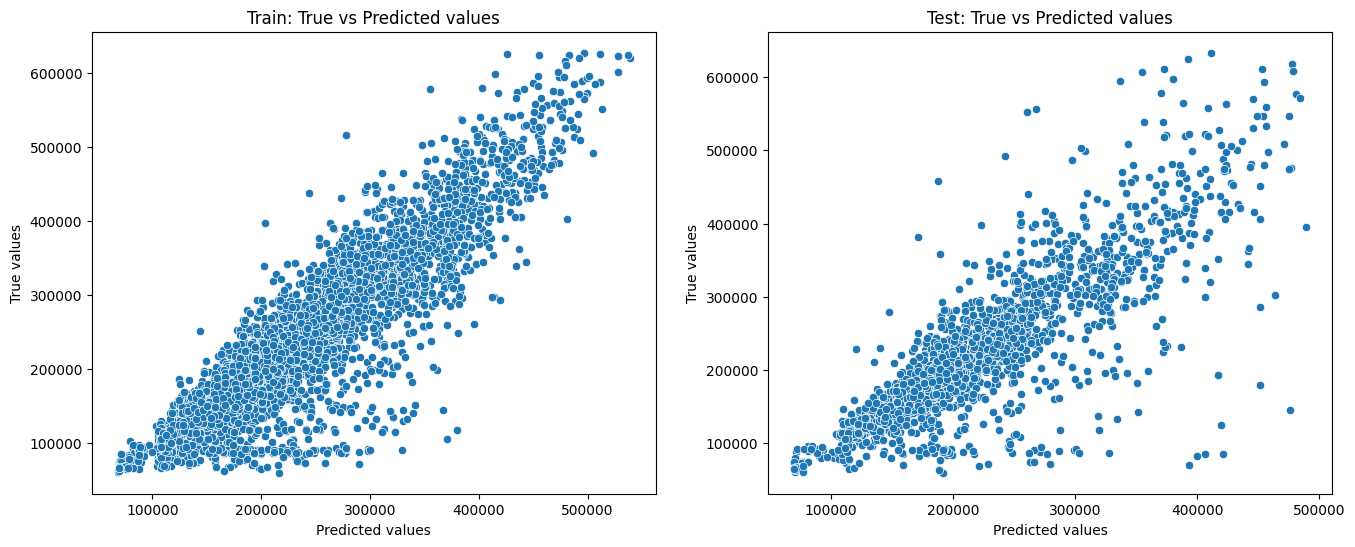

In [9]:
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

evaluate_preds(pd.Series(y_train['Price']), y_train_preds.flatten(), pd.Series(y_test['Price']), y_test_preds.flatten())

In [10]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(model, train, y['Price'], cv=cv, scoring='r2', n_jobs=-1)
print('R2 для случайного леса = ', round(scores.mean(), 4))

R2 для случайного леса =  0.72


In [11]:
feature_importances = pd.DataFrame(zip(*[X_train.columns], model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)
feature_importances

,feature_name,importance
2,Square,0.371781
1,Rooms,0.166508
9,Social_2,0.107308
8,Social_1,0.075243
10,Social_3,0.072386
0,DistrictId,0.052175
5,Ecology_1,0.039952
14,house_age,0.034090
4,House_Floor,0.027210
12,Shops_1,0.021706


# удалим фичи с минимальной важностью

In [13]:
train.drop(['Ecology_3', 'Shops_2', 'Ecology_2'], axis=1, inplace=True)
test.drop(['Ecology_3', 'Shops_2', 'Ecology_2'], axis=1, inplace=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(train, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=42)

In [15]:
parameters = {
    'n_estimators': [150, 200, 250],
    'max_features': np.arange(5, 9),
    'max_depth': np.arange(5, 10),
}

clf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    scoring='r2',
    cv=5,
)
clf.fit(X_train, y_train['Price'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': array([5, 6, 7, 8]),
                         'n_estimators': [150, 200, 250]},
             scoring='r2')

In [16]:
model = clf.best_estimator_

Train:	R2 = 0.82	MAE = 25275
Test:	R2 = 0.706	MAE = 30543


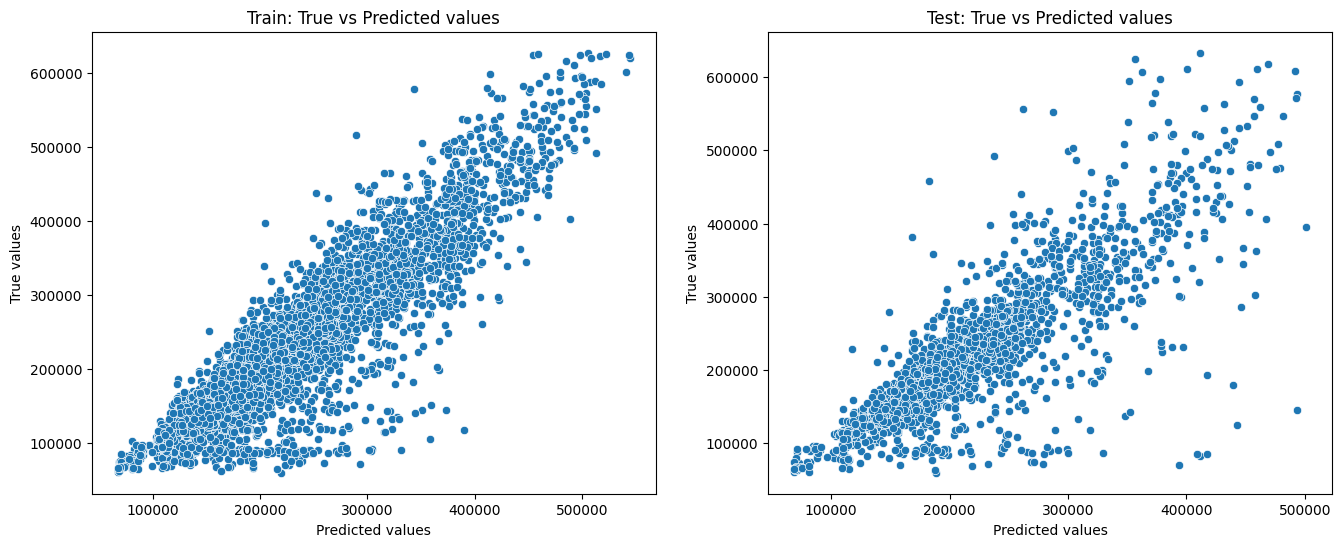

In [17]:
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

evaluate_preds(pd.Series(y_train['Price']), y_train_preds.flatten(), pd.Series(y_test['Price']), y_test_preds.flatten())

In [18]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(model, train, y['Price'], cv=cv, scoring='r2', n_jobs=-1)
print('R2 для случайного леса = ', round(scores.mean(), 4))

R2 для случайного леса =  0.721
